In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [2]:
geo_df = gpd.read_file('data/london_boroughs.json')

pca = pd.read_csv("data/pca1_x.csv")

pca.rename(columns={"Unnamed: 0" : "Borough"}, inplace=True)

pca_top_components = pca[["Borough", "PC1", "PC2", "PC3"]]

pca_top_components.head()

,Borough,PC1,PC2,PC3
0,Barking and Dagenham,-6194.868984,503.748930,232.050014
1,Barnet,922.971886,-514.321789,-265.273772
2,Bexley,-10440.125404,462.821462,-170.324975
3,Brent,3307.244216,-369.937748,-693.590447
4,Bromley,-2427.969331,380.347350,327.375540


In [3]:
pca2 = pca[pca.columns[1:]]
pca_normalized=(pca2-pca2.min())/(pca2.max()-pca2.min())

pca_normalized["Borough"] = pca["Borough"]

pca_normalized.head()

spatiotemporal_df = geo_df.merge(pca_normalized, left_on="name", right_on="Borough", how="left")

C:\Users\josea\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


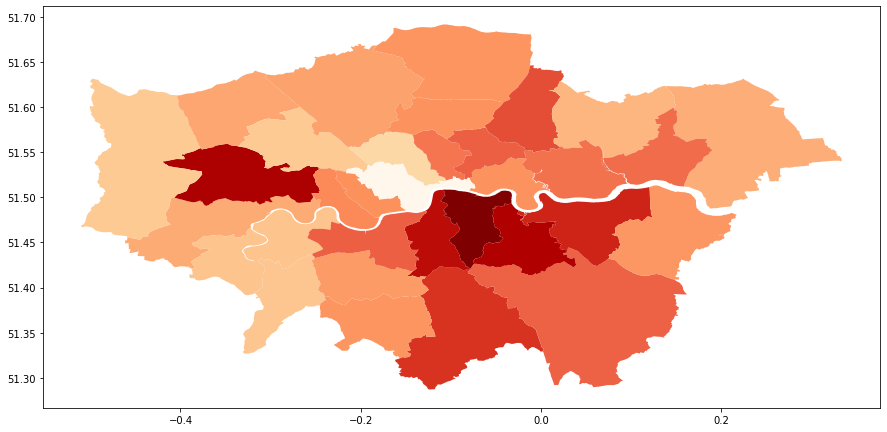

In [8]:
pca_component = "PC3"
spatiotemporal_df.plot(column=pca_component, figsize=(15,20), cmap='OrRd')

In [14]:
# London is missing from the Borough crime dataset
spatiotemporal_df[spatiotemporal_df["Borough"].isna()]

,id,name,code,area_hectares,inner_statistical,geometry,PC1,PC2,PC3,PC4,...,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,Borough
32,33,City of London,E09000001,314.942,1,"MULTIPOLYGON (((-0.11157 51.51075, -0.11159 51...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
